In [1]:
import numpy as np

In [3]:
Ts  = [1e6, 1e7,1e8]
f0s = [1e-3,1e-2,1e-1]
As  = [1e-23,1e-22,1e-21]

In [26]:
phi0 = np.pi/4

In [5]:
import plot_settings
import matplotlib.pyplot as plt

In [56]:
def gamma11(T):
    return T/2

def gamma22(A,T):
    return 2/3 * np.pi**2 * A**2 * T**3

def gamma33(A,T):
    return A**2 * T/2

In [55]:
from numpy.linalg import inv

In [74]:
FM  = {
    'values': [],
    'diags':[]
}
for A in As:
    for T in Ts:
        temp = np.array([[gamma11(T), 0, 0],
        [0, gamma22(A,T), 0],
        [0, 0, gamma33(A,T)]])
        FM['diags'].append(np.sqrt(np.diag(inv(temp))))
        FM['values'].append([A,T])

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\g'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\g'
C:\Users\ricca\AppData\Local\Temp\ipykernel_8836\1640273556.py:21: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'$\sqrt{{\gamma^{{-1}}_{{{i+1}{i+1}}}}}$')
C:\Users\ricca\AppData\Local\Temp\ipykernel_8836\1640273556.py:21: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f'$\sqrt{{\gamma^{{-1}}_{{{i+1}{i+1}}}}}$')


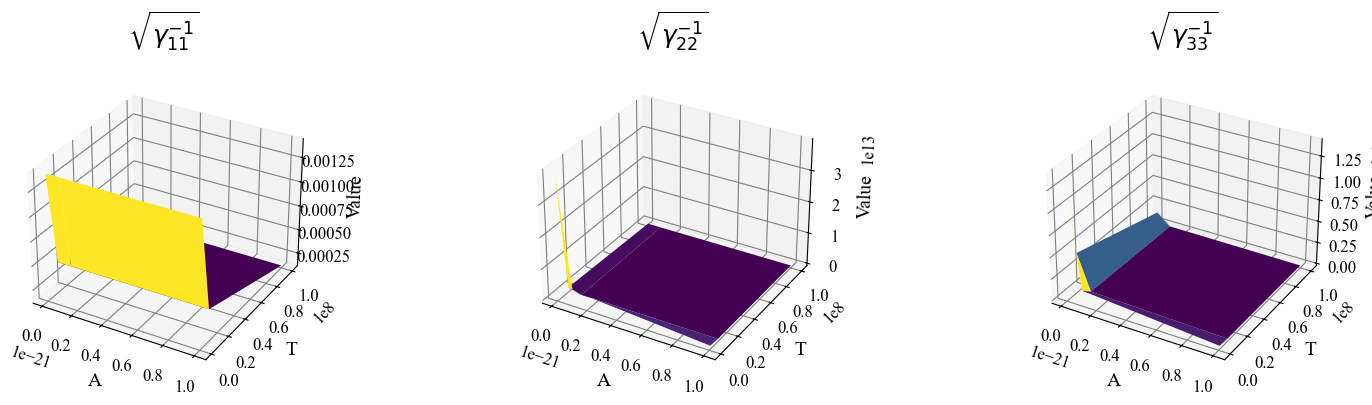

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Convert lists to structured arrays
As_vals = np.array([v[0] for v in FM['values']])
Ts_vals = np.array([v[1] for v in FM['values']])
diags = np.array(FM['diags'])  # Shape: (len(As)*len(Ts), 3)

# Reshape assuming grid
nA = len(np.unique(As_vals))
nT = len(np.unique(Ts_vals))
A_grid = As_vals.reshape((nA, nT))
T_grid = Ts_vals.reshape((nA, nT))

fig = plt.figure(figsize=(16, 4))
for i in range(3):
    Z = diags[:, i].reshape((nA, nT))
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.plot_surface(A_grid, T_grid, Z, cmap='viridis')
    ax.set_title(f'$\sqrt{{\gamma^{{-1}}_{{{i+1}{i+1}}}}}$')
    ax.set_xlabel('A')
    ax.set_ylabel('T')
    ax.set_zlabel('Value')

plt.tight_layout()
plt.show()


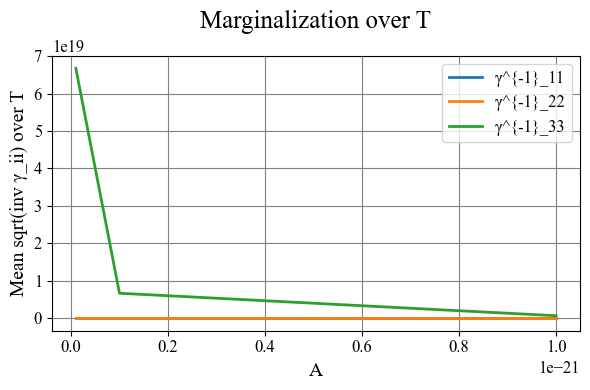

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to arrays
vals = np.array(FM['values'])  # shape (N, 2)
diags = np.array(FM['diags'])  # shape (N, 3)

As_unique = np.unique(vals[:, 0])
Ts_unique = np.unique(vals[:, 1])

marg_A = []
for A in As_unique:
    # Select rows where A matches
    idx = vals[:, 0] == A
    avg = diags[idx].mean(axis=0)  # mean over T
    marg_A.append(avg)

marg_A = np.array(marg_A)

# Plot
plt.figure(figsize=(6, 4))
for i in range(3):
    plt.plot(As_unique, marg_A[:, i], label=f'γ^{{-1}}_{i+1}{i+1}')
plt.xlabel('A')
plt.ylabel('Mean sqrt(inv γ_ii) over T')
plt.legend()
plt.title('Marginalization over T')
plt.grid(True)
plt.show()


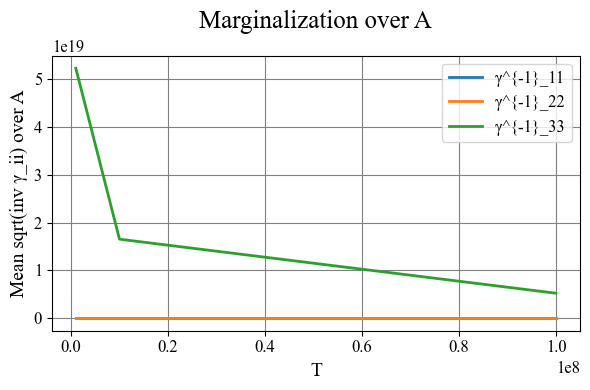

In [90]:
marg_T = []
for T in Ts_unique:
    idx = vals[:, 1] == T
    avg = diags[idx].mean(axis=0)  # mean over A
    marg_T.append(avg)

marg_T = np.array(marg_T)

plt.figure(figsize=(6, 4))
for i in range(3):
    plt.plot(Ts_unique, marg_T[:, i], label=f'γ^{{-1}}_{i+1}{i+1}')
plt.xlabel('T')
plt.ylabel('Mean sqrt(inv γ_ii) over A')
plt.legend()
plt.title('Marginalization over A')
plt.grid(True)
plt.show()
